In [2]:
import numpy as np
from caffe2.python import core, workspace as ws, schema, net_drawer, model_helper

In [3]:
from IPython import display

In [4]:
rng = np.random.default_rng()

In [5]:
m = model_helper.ModelHelper(name="demo")

In [6]:
m.param_init_net.Proto()

name: "demo_init"

In [7]:
m.net.Proto()

name: "demo"

In [8]:
W = m.param_init_net.XavierFill([], "W", shape=[5, 20])
b = m.param_init_net.ConstantFill([], "b", shape=[5,])
m.param_init_net.ConstantFill([], "d", shape=[5, 5])

BlobReference("d")

In [9]:
z = m.net.FC(["X", "W", "b"], "z")
logits = m.net.Sigmoid(["z"], ["logits"])
probs, loss = m.net.SoftmaxWithLoss([logits, "targets"], ["probs", "loss"])

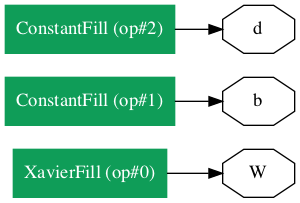

In [10]:
g = net_drawer.GetPydotGraph(m.param_init_net, rankdir="LR")
display.Image(g.create_png(), width=500)

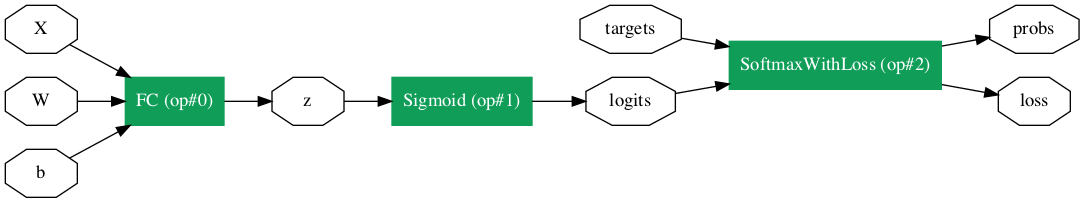

In [11]:
g = net_drawer.GetPydotGraph(m.net, rankdir="LR")
display.Image(g.create_png(), width=500)

In [12]:
grads = m.AddGradientOperators([loss])

In [13]:
grads

{BlobReference("loss"): BlobReference("loss_autogen_grad"),
 BlobReference("logits"): BlobReference("logits_grad"),
 BlobReference("z"): BlobReference("z_grad"),
 BlobReference("X"): BlobReference("X_grad"),
 BlobReference("W"): BlobReference("W_grad"),
 BlobReference("b"): BlobReference("b_grad")}

In [17]:
type(m.net.Proto())

caffe2.proto.caffe2_pb2.NetDef

In [18]:
dir(m.net.Proto())

['ByteSize',
 'Clear',
 'ClearExtension',
 'ClearField',
 'CopyFrom',
 'DESCRIPTOR',
 'DiscardUnknownFields',
 'Extensions',
 'FindInitializationErrors',
 'FromString',
 'HasExtension',
 'HasField',
 'IsInitialized',
 'ListFields',
 'MergeFrom',
 'MergeFromString',
 'ParseFromString',
 'RegisterExtension',
 'SerializePartialToString',
 'SerializeToString',
 'SetInParent',
 'UnknownFields',
 'WhichOneof',
 '_CheckCalledFromGeneratedFile',
 '_SetListener',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_extensions_by_name',
 '_extensions_by_number',
 'arg',
 'device_option',
 'external_input',
 'external_output',
 'na

In [20]:
proto = m.net.Proto()

In [22]:
type(proto.op)

google.protobuf.pyext._message.RepeatedCompositeContainer

In [ ]:
m = 8
n = 10
k = 5

In [ ]:
net = core.Net("net")
param_init_net = core.Net("param_init_net")

In [ ]:
W = param_init_net.UniformFill([], ["W"], shape=[k, n], run_once=0)
b = param_init_net.UniformFill([], ["b"], shape=[k], run_once=0)

In [ ]:
X = rng.random((m, n)).astype(np.float32)
ws.FeedBlob("X", X)
X = core.BlobReference("X")

In [ ]:
ws.Blobs()

In [ ]:
net.FC([X, W, b])

In [ ]:
net.Proto()

In [ ]:
param_init_net.Proto()

In [ ]:
graph = net_drawer.GetPydotGraph(param_init_net, rankdir="LR")
display.Image(graph.create_png(), width=300)

In [ ]:
graph = net_drawer.GetPydotGraph(net, rankdir="LR")
display.Image(graph.create_png(), width=300)

In [ ]:
ws.RunNetOnce(param_init_net)

In [ ]:
ws.Blobs()

In [ ]:
ws.CreateNet(net)

In [ ]:
ws.Blobs()

In [ ]:
ws.FetchBlob("net/FC")

In [ ]:
ws.RunNet(net)

In [ ]:
ws.FetchBlob("net/FC")

In [ ]:
type(net)

In [ ]:
net.FC(["X", "W", "b"])

In [ ]:
ws.Blobs()

In [ ]:
net.Proto()

In [ ]:
rng = np.random.default_rng()

In [ ]:
m = 8
n = 10
k = 5

In [ ]:
X = rng.standard_normal((m, n)).astype(np.float32)
ws.FeedBlob("X", X)

In [ ]:
ws.Blobs()

In [ ]:
net.

In [ ]:
print("Does shift-ENTER work in normal jupyter?")

In [ ]:
y = X @ W.T + b

In [ ]:
y.shape

In [ ]:
y

In [ ]:
ws.FeedBlob("X", X)
ws.FeedBlob("W", W)
ws.FeedBlob("b", b)

In [ ]:
ws.RunNetOnce(net)

In [ ]:
ws.Blobs()

In [ ]:
ws.FetchBlob("y")

In [ ]:
b.shape